In [19]:
import sys, os
import pandas as pd
sys.path.append(os.path.realpath('..'))
from MiningBot.AuditHistory.History import History
import json
import socket
from datetime import datetime, timedelta

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import hex2color
import matplotlib.colors as mc
import mplcyberpunk
plt.style.use("cyberpunk")
plt.rcParams['figure.facecolor'] = '#0d1117'
plt.rcParams['axes.facecolor'] = '#0d1117'
plt.rcParams['savefig.facecolor'] = '#0d1117'

In [21]:
config_dir = r'../MiningBot/Configs/configs.json'
config = json.load(open(config_dir))[socket.gethostname()]

In [22]:
log = History(config_dir=config_dir)

In [23]:
records = log.get_all()

In [24]:
df = pd.DataFrame(records)
df = df.sort_values(by='datetime', ascending=False)
df['datetime'] = pd.to_datetime(df['datetime'])
df['timedelta'] = df['datetime'].diff().dt.seconds.div(60, fill_value=0)
df

,_id,datetime,action,context,timedelta
211,63f5665ec0b581d0e5dc62cc,2023-02-22 00:48:30.050,Extraction,,0.000000
210,63f56656c0b581d0e5dc62cb,2023-02-22 00:48:22.340,Navigating,Site Two Alpha,1439.866667
209,63f563df726cf8c393703461,2023-02-22 00:37:51.380,Extraction,,1429.483333
208,63f561da726cf8c393703460,2023-02-22 00:29:14.830,Extraction,,1431.383333
207,63f55f40726cf8c39370345f,2023-02-22 00:18:08.015,Extraction,,1428.883333
...,...,...,...,...,...
4,63f42151d2bfb6cfc297a6f4,2023-02-21 01:41:37.885,Extraction,,1431.383333
3,63f41f4dd2bfb6cfc297a6f3,2023-02-21 01:33:01.297,Extraction,,1431.383333
2,63f41dfcd2bfb6cfc297a6f2,2023-02-21 01:27:24.965,Extraction,,1434.383333
1,63f41cacd2bfb6cfc297a6f1,2023-02-21 01:21:48.775,Extraction,,1434.383333


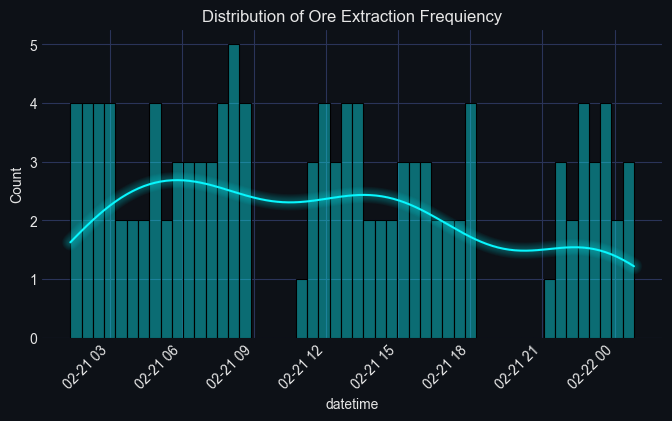

In [40]:
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    #'stat':'percent',
    'bins':50
}


n_cols = 1
n_rows = 1
cell_with_dim = 8
cell_height_dim = 4

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * cell_with_dim, n_rows * cell_height_dim))
plt.title('Distribution of Ore Extraction Frequiency')
sns.histplot(df[df['action']=='Extraction']['datetime'], label='Train X', color='#08F7FE', ax=ax, **histplot_hyperparams)
sns.histplot(df[df['action']=='Navigating']['datetime'], label='Train X', color='#08F7FE', ax=ax, **histplot_hyperparams)
plt.xticks(rotation=45, ha='right')
mplcyberpunk.make_lines_glow(ax)